In [ ]:
#importar librerias
import numpy as np
import random
from matplotlib import pyplot as plt
import math

In [ ]:
class Neural_net():
  def __init__(self, layers, input_data, target, n):
    self.layers = layers
    self.input_data = input_data
    self.target = target
    self.weights = []
    self.bias = []
    self.n = n
    
    initial_err = 99
    err = np.ones(len(layers))*initial_err
    
    self.init()


  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def d_sigmoid(self, x):
    return self.sigmoid(x)*(1.0 - self.sigmoid(x))

  def init_bias(self):
    for layer in range(len(self.layers)):
      if(layer != 0):
        bias_per_layer = []
        for neuron in range(self.layers[layer]):
          random_bias = random.random()
          bias_per_layer.append(random_bias)
        self.bias.append(bias_per_layer)
    print("Bias iniciales: "+str(self.bias))
    return self.bias
          

  def init_weights(self):

    weights_per_neuron = []
    weights_per_layer  = []

    for layer in range(len(self.layers)):
      if(layer!=0):
        for neuron in range(self.layers[layer]):
          for i in range(self.layers[layer-1]):
            random_weight = random.random()
            weights_per_neuron.append(random_weight)
          weights_per_layer.append(weights_per_neuron)
          weights_per_neuron = []
        self.weights.append(weights_per_layer)
        weights_per_layer = []
    print("Pesos iniciales: "+str(self.weights))
    return self.weights

  def init(self):
        self.init_weights()
        self.init_bias()
        #self.init_delta()

  def feed_fordward(self, input_data_row):
    outputs = []
    layers_outputs = []
    for layer in range(len(self.layers)):
        neurons_outputs = []
        if(layer!=0):
            for neuron in range(self.layers[layer]):
                #La primera capa oculta tiene como input los patrones
                if(layer == 1):
                    neuron_output = self.sigmoid((np.dot(self.weights[layer-1][neuron], input_data_row) + self.bias[layer-1][neuron]))
                else:
                    neuron_output = self.sigmoid((np.dot(self.weights[layer-1][neuron], layers_outputs[layer-2]) + self.bias[layer-1][neuron]))
                neurons_outputs.append(neuron_output)
            layers_outputs.append(neurons_outputs)
    outputs.append(layers_outputs)
    return layers_outputs


  def back_propagation(self, delta):
    for i in reversed(range(len(self.layers))):
        if (i != len(self.layers)-1 and i != 0):
            for k in range(len(delta[i])):
                for j in range(len(delta[i-1])):
                    delta[i-1][j] = self.weights[i-1][j][k]*delta[i][k]
    return delta
            
  def update_bias(self, delta):
    for i in range(len(self.layers)):
        if i != 0:
            for j in range(self.layers[i]):
                self.bias[i-1][j] = self.bias[i-1][j] + self.n*delta[i-1][j]
        
  def update_weights(self, delta, layer_outputs, input_data_row):
    for i in range(len(self.weights)):
        if i != 0:
            for j in range(self.layers[i]):
                for k in range(len(self.weights[i-1][j])):
                    if i == 1:
                        self.weights[i-1][j][k] = self.weights[i-1][j][k] + self.n*delta[i-1][j]*self.d_sigmoid(layer_outputs[i-1][j])*input_data_row[k]
                    else:
                        self.weights[i-1][j][k] = self.weights[i-1][j][k] + self.n*delta[i-1][j]*self.d_sigmoid(layer_outputs[i-1][j])*layer_outputs[i-1][j]
    
  def train(self):
    epoch = 0
    tol = 0.0001
    n = 0.3
    mean_global_err = 99
    
    delta  = []
    
    for layer in range(len(self.layers)):
      if(layer != 0):
        err_per_layer = np.zeros(self.layers[layer])
        delta.append(err_per_layer)
        
    err    = []
    
    while(epoch <= 50):
        output = []
        print("-----------")
        for i in range(len(input_data)):
            #calcular la salida
            neuron_outputs = self.feed_fordward(input_data[i])
            y = neuron_outputs[-1][0]
            output.append(y)
            
            #calcular el error del patron
            current_err = target[i]-y
            err.append(current_err)
            delta[-1] = [current_err]
            
            #propagar el error
            delta = self.back_propagation(delta)
            
            #actualizar los parametros de la red
            self.update_bias(delta)
            self.update_weights(delta, neuron_outputs, input_data[i])
        #calcular el error cuadratico medio
        for i in range(len(err)):
            err[i] = (err[i]**2)/2
        print("epoch "+str(epoch))
        print("output"+str(output))
        print("-----------")
        epoch = epoch+1
    
    #valores finales
    print("Bias finales: "+str(self.bias))
    print("Pesos finales: "+str(self.weights))
    
    #gráficos de error
    plt.plot(range(len(err)), err)
    plt.xlabel('t')
    plt.ylabel('error')
    plt.show()
        


Pesos iniciales: [[[0.18492532704203257, 0.4061789362199202], [0.3091884294158469, 0.07237093407065942]], [[0.2508758286668282, 0.6423268279794888]]]
Bias iniciales: [[0.18258137284152798, 0.5427634248633606], [0.602996289089577]]
-----------
epoch 0
output[0.758797230562929, 0.7786235836509814, 0.737238861296499, 0.6957232588999773]
-----------
-----------
epoch 1
output[0.697994910727913, 0.7245524261623831, 0.681212993276412, 0.6391351670139618]
-----------
-----------
epoch 2
output[0.6460764529502094, 0.6784039765240351, 0.6350786793280557, 0.5939354613836773]
-----------
-----------
epoch 3
output[0.6049422868619799, 0.6416993988789518, 0.5993134944466086, 0.5596088895777086]
-----------
-----------
epoch 4
output[0.5737883916440365, 0.6137387484599446, 0.5725445094551093, 0.5342576677431831]
-----------
-----------
epoch 5
output[0.5507805721119741, 0.5929637418511092, 0.5528936413526783, 0.5158047558255141]
-----------
-----------
epoch 6
output[0.5340163063509938, 0.5777424684

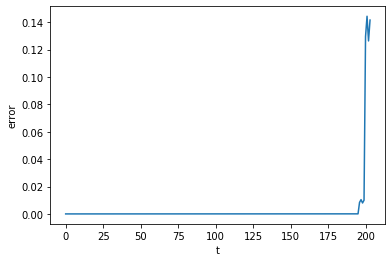

Pesos iniciales: [[[0.21357818879420543, 0.3489726141798387, 0.7825116045253436], [0.893640922136559, 0.9160092796419637, 0.7929596425014771], [0.531660353113722, 0.24309586147305395, 0.27050953565233293], [0.18876847366227623, 0.2939696910364539, 0.2546999171939994], [0.8345657251237567, 0.8228350378773354, 0.9037717417928681]], [[0.657260632217732, 0.9321756241226248, 0.8003586983389516, 0.9155308595137873, 0.8314612670988675]]]
Bias iniciales: [[0.35832358345828685, 0.7712656681480802, 0.6902472656911653, 0.3597685500083744, 0.017792544128121812], [0.6081791010498236]]
-----------
epoch 0
output[0.9578800448392935, 0.9749807972950376, 0.9605344112845061, 0.9603189548946964, 0.9422059639018866, 0.9438110903959714, 0.9423247755037221, 0.9601460066715403]
-----------
-----------
epoch 1
output[0.8095025711675609, 0.8865809677922889, 0.8336113547230285, 0.8450986588804665, 0.7888699901819578, 0.8083261561073826, 0.8142458401098557, 0.8816284799944724]
-----------
-----------
epoch 2
out

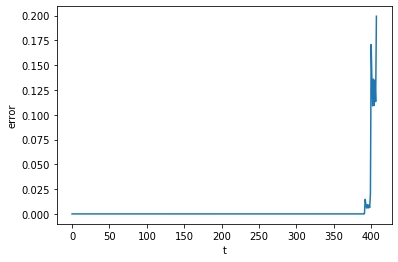

Pesos iniciales: [[[0.9407535164170129, 0.4050015970827089, 0.9071560978947292, 0.48785749258459343], [0.7389423172488391, 0.4824245289111503, 0.07011152720393421, 0.10923390783284181], [0.7536014563310465, 0.9066139844581742, 0.682537628956227, 0.32756482045368873], [0.5647816108441871, 0.33900200704522676, 0.37296518014643854, 0.12714208702911822], [0.06321728456395725, 0.12193777557121, 0.9512854181870837, 0.6160156460586816], [0.9657312111550901, 0.5563152988264136, 0.4516200450340775, 0.5768092571948543], [0.9495269840409063, 0.02981657163719298, 0.5454492654328066, 0.5160073448395243], [0.7859466867734918, 0.7945830918241858, 0.583553043852064, 0.978751042870653], [0.6090183585481217, 0.5111744468699019, 0.7784329443903341, 0.5581973097472814], [0.16560954384314586, 0.745615984829869, 0.6982042455414669, 0.8382960007846056], [0.3694691466469183, 0.3719784365094555, 0.41529225965995975, 0.35865432348399673], [0.21912665594151381, 0.8666275010617349, 0.3456329265572603, 0.701474079

epoch 2
output[0.9983323191389112, 0.9998909444822653, 0.9997417313914887, 0.9999516741771095, 0.9996312420477257, 0.9999299477344973, 0.9999226177594385, 0.9999932262943042, 0.9925639983676955, 0.9984539457270615, 0.998387548489651, 0.9998581323424739, 0.9975721652920226, 0.9997575672140484, 0.9993792876383158, 0.9998178576267702]
-----------
-----------
epoch 3
output[0.7665664890479638, 0.965847860440493, 0.9456997456574584, 0.9864927079370459, 0.9339619601911969, 0.9839156665077289, 0.9838961409568288, 0.9977025871347397, 0.5174161480690954, 0.8418378163711748, 0.8588395059674414, 0.9790577877590084, 0.8325520641607905, 0.9740254659043707, 0.9530701705601232, 0.9851016126731106]
-----------
-----------
epoch 4
output[0.12170973478037887, 0.5304564566670884, 0.4929358613951948, 0.8121988301681784, 0.5144572853727212, 0.8306551883376844, 0.847369342952798, 0.9718170634546981, 0.11895879641370306, 0.4082153868114697, 0.5002612227257618, 0.8851006589987046, 0.5102089989868127, 0.888573

epoch 27
output[0.10651001421540397, 0.3160614535113836, 0.3178321523229541, 0.5418722179152128, 0.35010581400202057, 0.582598275545281, 0.6468254871663691, 0.8601382195708939, 0.14410376990298931, 0.30531229880228083, 0.3923630158499233, 0.7054883994240858, 0.4073387004288784, 0.7199959486081222, 0.6775241426787972, 0.8174490686120458]
-----------
-----------
epoch 28
output[0.10971553170536448, 0.31918216888838674, 0.32083655810092093, 0.5413582364935488, 0.3524009696858059, 0.5810739131111279, 0.6456180162681178, 0.8576508884931707, 0.14735158403746523, 0.307068953120945, 0.393915281931222, 0.7030253816400254, 0.4083672192137954, 0.717164348293053, 0.675501412688259, 0.8143641469929606]
-----------
-----------
epoch 29
output[0.11289344364219253, 0.3221963170758472, 0.32373516580560746, 0.5408466798565973, 0.35461276307832607, 0.5795922039301049, 0.6444406288665081, 0.8552146718450582, 0.15054676108875864, 0.30876255543177583, 0.3954058012294038, 0.7006383703455716, 0.40935521267058

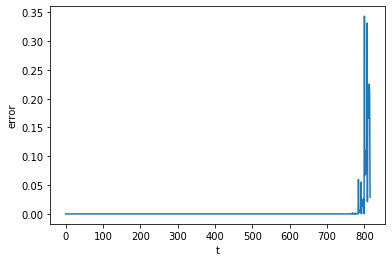

'\nSELECCION DE FUNCION DE ACTIVACION\n\nPara las redes neuronales se uso la sigmoide como la funcion de activacion dado\nque el dominio de la funcion es entre 0 y 1 que era la representacion que teniamos\nen la salida. Podia ser 0 o 1.\n\n\nCONCLUSIONES\n\n- Para problemas sencillos como la compuerta xor de 2 entradas, es mejor no\nllenar de neuronas y capas a la red porque no estamos sacandole provecho a tanto\nprocesamiento y como se puede observar en la ultima red donde se agregaron 100\nneuronas, los calculos escalan muy rapidamente a medida que agregamos mas capas\ny neuronas.\n\n- Como contraparte a la conclusion anterior, si no agregamos suficientes neuronas\npude que nos estanquemos en un minimo local al minimizar el error. Esto no se pudo\nrealizar experimentalmente debido a que tenemos un error en el codigo pero las\nmatematicas referentes al algoritmo del descenso del gradiente lo confirman asi\nque se tuvo encuenta en el diseño de la red.\n\n- Aca tenemos entrenados 3 mode

In [ ]:
#----------------------------------------------------------
#SOLUCION
#----------------------------------------------------------

#Datos de entrenamiento
input_data = [[0,0],
              [0,1],
              [1,0],
              [1,1]]

target = [1,0,0,1]

#hiperparametros
layers = [2,2,1]
n = 0.3

red_xor_2_entradas = Neural_net(layers, input_data, target, n)
red_xor_2_entradas.train()

#----------------------------------------------------------

#Datos de entrenamiento
input_data = [[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]]

target = [1,0,0,1,0,1,1,0]

#hiperparametros
layers = [3,5,1]
n = 0.3

red_xor_3_entradas = Neural_net(layers, input_data, target, n)
red_xor_3_entradas.train()

#----------------------------------------------------------

#Datos de entrenamiento
input_data = [[0,0,0,0],
              [0,0,0,1],
              [0,0,1,0],
              [0,0,1,1],
              [0,1,0,0],
              [0,1,0,1],
              [0,1,1,0],
              [0,1,1,1],
              [1,0,0,0],
              [1,0,0,1],
              [1,0,1,0],
              [1,0,1,1],
              [1,1,0,0],
              [1,1,0,1],
              [1,1,1,0],
              [1,1,1,1]]

target = [1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1]

#hiperparametros
layers = [4,100,1]
n = 0.3

red_xor_4_entradas = Neural_net(layers, input_data, target, n)
red_xor_4_entradas.train()

#----------------------------------------------------------
#EXPLICACION
#----------------------------------------------------------

'''
SELECCION DE FUNCION DE ACTIVACION

Para las redes neuronales se uso la sigmoide como la funcion de activacion dado
que el dominio de la funcion es entre 0 y 1 que era la representacion que teniamos
en la salida. Podia ser 0 o 1.


CONCLUSIONES

- Para problemas sencillos como la compuerta xor de 2 entradas, es mejor no
llenar de neuronas y capas a la red porque no estamos sacandole provecho a tanto
procesamiento y como se puede observar en la ultima red donde se agregaron 100
neuronas, los calculos escalan muy rapidamente a medida que agregamos mas capas
y neuronas.

- Como contraparte a la conclusion anterior, si no agregamos suficientes neuronas
pude que nos estanquemos en un minimo local al minimizar el error. Esto no se pudo
realizar experimentalmente debido a que tenemos un error en el codigo pero las
matematicas referentes al algoritmo del descenso del gradiente lo confirman asi
que se tuvo encuenta en el diseño de la red.

- Aca tenemos entrenados 3 modelos que aprendieron a realizar las opeciones de
las compuertas xor para 2, 3 y 4 entradas. Sin embargo nos surgio la pregunta
¿Es posible entrenar la red para que pueda realizar la operacion para cualquier
numero de entradas n? A este problema no le podemos dar solucion con la forma
como estamos entrenado nuestras redes pero, segun los temas tratados en clases,
si tomamos un dataset grande y lo entrenamos con el 70% de los datos y con el 30%
restante hacemos predicciones, vamos a poder solucionar el problema y ademas
evitar el overfitting o que la red "memorice los datos"
'''